# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

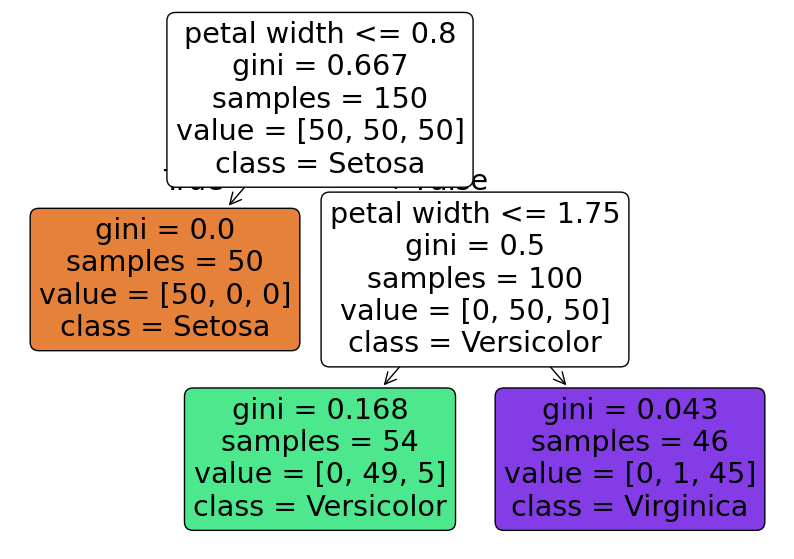

In [6]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

In [ ]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

In [8]:
#YOUR ANSWER HERE
# Obszary klas są zbyt precyzyjnie dopasowane do danych treningowych
# Przez dużą głębokość jest duża szansa na przeuczenie

### Zadanie 2

Proszę o wczytanie, opisanie zbioru danych: https://www.kaggle.com/datasets/mathchi/diabetes-data-set. Proszę o usunięcie danych None. Zbiór danych powinien być użyty do dalszych oblicze

In [9]:
import pandas as pd

# Wczytanie zbioru danych
df = pd.read_csv("diabetes.csv")

# Usunięcie braków danych (None / NaN)
df = df.dropna()

# Opis danych
print("Informacje o zbiorze:")
print(df.info())

print("\nStatystyki opisowe:")
print(df.describe())

print("\nPierwsze wiersze danych:")
print(df.head())

Informacje o zbiorze:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statystyki opisowe:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1

In [14]:
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


### Zadanie 3

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Outcome'])  # cechy (features)
y = df['Outcome']                 # etykieta (target)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

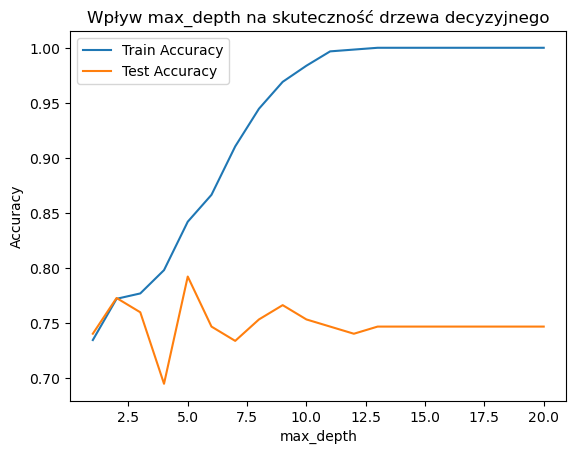

    max_depth  Train Accuracy  Test Accuracy
0           1        0.734528       0.740260
1           2        0.771987       0.772727
2           3        0.776873       0.759740
3           4        0.798046       0.694805
4           5        0.842020       0.792208
5           6        0.866450       0.746753
6           7        0.910423       0.733766
7           8        0.944625       0.753247
8           9        0.969055       0.766234
9          10        0.983713       0.753247
10         11        0.996743       0.746753
11         12        0.998371       0.740260
12         13        1.000000       0.746753
13         14        1.000000       0.746753
14         15        1.000000       0.746753
15         16        1.000000       0.746753
16         17        1.000000       0.746753
17         18        1.000000       0.746753
18         19        1.000000       0.746753
19         20        1.000000       0.746753


In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Zakres testowanych wartości max_depth
depths = range(1, 21)

train_accuracies = []
test_accuracies = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    # Skuteczność na zbiorze treningowym
    acc_train = clf.score(X_train, y_train)
    # Skuteczność na zbiorze testowym
    acc_test = clf.score(X_test, y_test)

    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)

# Wykres zależności skuteczności od max_depth
plt.plot(depths, train_accuracies, label="Train Accuracy")
plt.plot(depths, test_accuracies, label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Wpływ max_depth na skuteczność drzewa decyzyjnego")
plt.legend()
plt.show()

# Tabela z wynikami – porównanie accuracy dla kolejnych głębokości
results_depth = pd.DataFrame({
    'max_depth': depths,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})
print(results_depth)


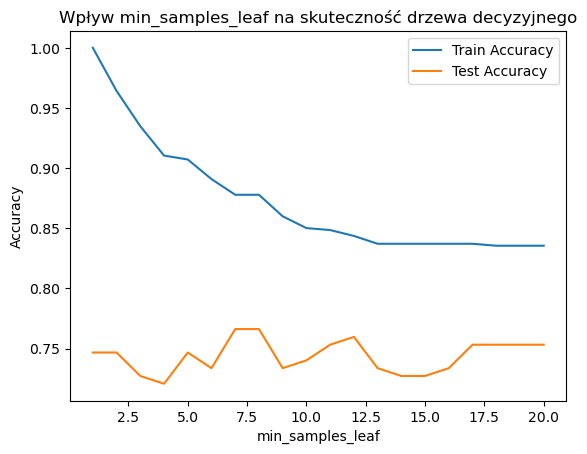

    min_samples_leaf  Train Accuracy  Test Accuracy
0                  1        1.000000       0.746753
1                  2        0.964169       0.746753
2                  3        0.934853       0.727273
3                  4        0.910423       0.720779
4                  5        0.907166       0.746753
5                  6        0.890879       0.733766
6                  7        0.877850       0.766234
7                  8        0.877850       0.766234
8                  9        0.859935       0.733766
9                 10        0.850163       0.740260
10                11        0.848534       0.753247
11                12        0.843648       0.759740
12                13        0.837134       0.733766
13                14        0.837134       0.727273
14                15        0.837134       0.727273
15                16        0.837134       0.733766
16                17        0.837134       0.753247
17                18        0.835505       0.753247
18          

In [12]:
min_samples_leaf_range = range(1, 21)
train_accuracies_leaf = []
test_accuracies_leaf = []

for msl in min_samples_leaf_range:
    clf = DecisionTreeClassifier(
        min_samples_leaf=msl,
        random_state=42
    )
    clf.fit(X_train, y_train)

    acc_train = clf.score(X_train, y_train)
    acc_test  = clf.score(X_test, y_test)

    train_accuracies_leaf.append(acc_train)
    test_accuracies_leaf.append(acc_test)

# Wykres
plt.plot(min_samples_leaf_range, train_accuracies_leaf, label="Train Accuracy")
plt.plot(min_samples_leaf_range, test_accuracies_leaf, label="Test Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Wpływ min_samples_leaf na skuteczność drzewa decyzyjnego")
plt.legend()
plt.show()

# Tabela
results_leaf = pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_range,
    'Train Accuracy': train_accuracies_leaf,
    'Test Accuracy': test_accuracies_leaf
})
print(results_leaf)


In [13]:
# Załóżmy, że w zmiennej best_accuracy_depth mamy najwyższą skuteczność
# i w best_param_depth odpowiadające jej max_depth
best_accuracy_depth = max(test_accuracies)
best_param_depth = depths[test_accuracies.index(best_accuracy_depth)]

# Analogicznie dla min_samples_leaf
best_accuracy_leaf = max(test_accuracies_leaf)
best_param_leaf = min_samples_leaf_range[test_accuracies_leaf.index(best_accuracy_leaf)]

comparison = pd.DataFrame({
    'Parametr': ['max_depth', 'min_samples_leaf'],
    'Najlepsza wartość': [best_param_depth, best_param_leaf],
    'Accuracy (test)': [best_accuracy_depth, best_accuracy_leaf]
})
print(comparison)


           Parametr  Najlepsza wartość  Accuracy (test)
0         max_depth                  5         0.792208
1  min_samples_leaf                  7         0.766234


### Zadanie 4

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Trenowanie drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prognozowane etykiety na zbiorze testowym (klasy)
y_pred = clf.predict(X_test)

# Szacowane prawdopodobieństwo dla każdej próbki
y_proba = clf.predict_proba(X_test)

In [16]:
# Pierwsze 5 wierszy z macierzy prawdopodobieństw
print("Prawdopodobieństwa predict_proba (pierwsze 5 próbek):")
print(y_proba[:5])

# Dla porównania - prognozowane etykiety (pierwsze 5):
print("\nPrognozowane etykiety (predict):")
print(y_pred[:5])

# Faktyczne etykiety (pierwsze 5):
print("\nRzeczywiste etykiety:")
print(y_test.iloc[:5].values)


Prawdopodobieństwa predict_proba (pierwsze 5 próbek):
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Prognozowane etykiety (predict):
[1 0 0 0 0]

Rzeczywiste etykiety:
[0 0 0 0 0]


### Zadanie 5

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Wybór tylko dwóch kolumn: Glucose i BMI
features = ['Glucose', 'BMI']
X_2d = df[features].values   # macierz 2D z wartościami cech
y = df['Outcome'].values     # wektor etykiet

# Podział na zbiór treningowy i testowy
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42
)

# Trenowanie drzewa decyzyjnego
clf2d = DecisionTreeClassifier(random_state=42)
clf2d.fit(X_train_2d, y_train_2d)

DecisionTreeClassifier(random_state=42)

In [18]:
# Określenie zakresów wartości dla Glucose (x) i BMI (y)
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

# Utworzenie siatki
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 1),
    np.arange(y_min, y_max, 1)
)

# Spłaszczamy siatkę i dokonujemy predykcji
Z = clf2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


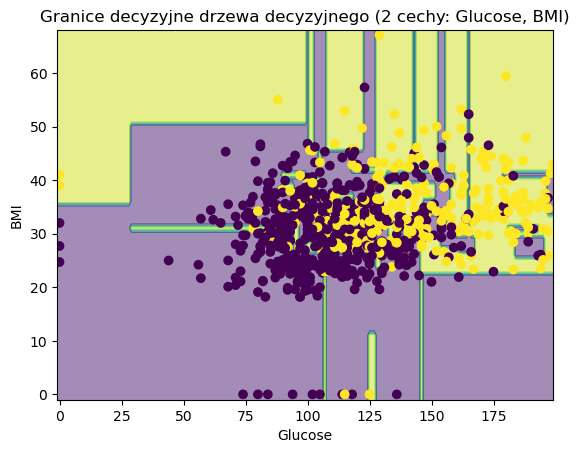

In [20]:
plt.contourf(xx, yy, Z, alpha=0.5)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Granice decyzyjne drzewa decyzyjnego (2 cechy: Glucose, BMI)")
plt.show()


### Zadanie 6

Proszę dokonać optymalizacji paramertrów (min. 3) modelu w oparciu o metodę przeszukiwania siatki: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [30]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Tworzymy obiekt GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_clf,          # nasz klasyfikator drzewa
    param_grid=param_grid,      # siatka parametrów
    scoring='accuracy',         # metryka oceny (np. accuracy)
    cv=5,                       # 5-krotna walidacja krzyżowa
    n_jobs=-1,                  # użycie wszystkich dostępnych rdzeni CPU
    verbose=1                   # poziom szczegółowości wypisywania
)

# Uruchamiamy przeszukiwanie siatki
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik (accuracy na CV):", grid_search.best_score_)

# Klasyfikator z najlepszymi parametrami
best_dt = grid_search.best_estimator_

# Sprawdźmy dokładność na zbiorze testowym
test_accuracy = best_dt.score(X_test, y_test)
print("Accuracy na zbiorze testowym:", test_accuracy)


Najlepsze parametry: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Najlepszy wynik (accuracy na CV): 0.759016393442623
Accuracy na zbiorze testowym: 0.7597402597402597
